NPM: 6181801030 

Nama: Clement Rivandi

NPM: 6181801032

Nama: Ivan Limosi

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

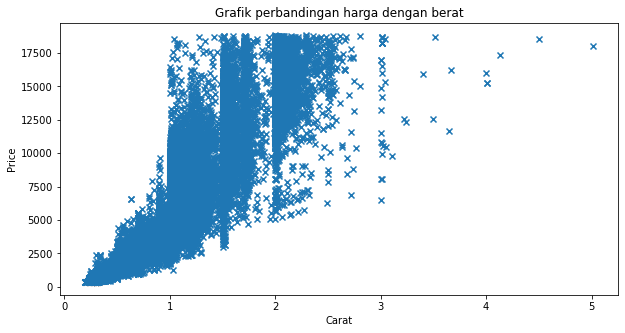

In [10]:
# Membaca data pada file diamonds.csv dan menyimpannya di variabel data
data = pd.read_csv('diamonds.csv')

### Eksplorasi Data #1 ### 

#Eksplorasi pertama dilakukan dengan membandingkan atribut-atribut bertipe numerik dengan harga berlian

# # Membuat grafik untuk melihat hubungan antara atribut Depth dengan Carat. 
# # Grafik dibuat dengan membandingkan rata-rata Price dengan jenis Cut
# DepthToCarat = data.groupby('cut').mean().sort_values('price')
# plt.figure(figsize=[10,5])
# plt.title('Grafik rata-rata jumlah price berdasarkan cut')
# plt.xlabel('Cut')
# plt.ylabel('Price')
# plt.bar(CutToPrice.index, CutToPrice['price'])
# plt.show()

PriceToCarat = data[['carat','price']].sort_values('carat')
plt.figure(figsize=[10,5])
plt.title('Grafik perbandingan harga dengan berat')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.scatter(PriceToCarat['carat'], PriceToCarat['price'], alpha=1, marker='x')
plt.show()


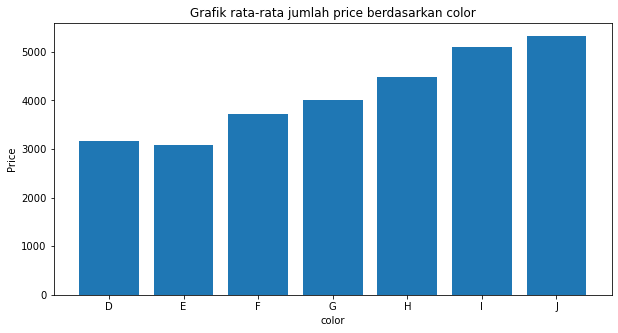

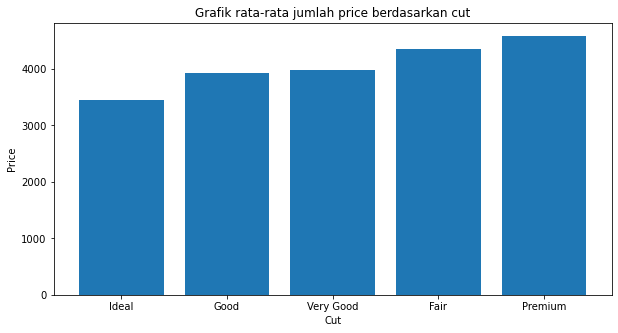

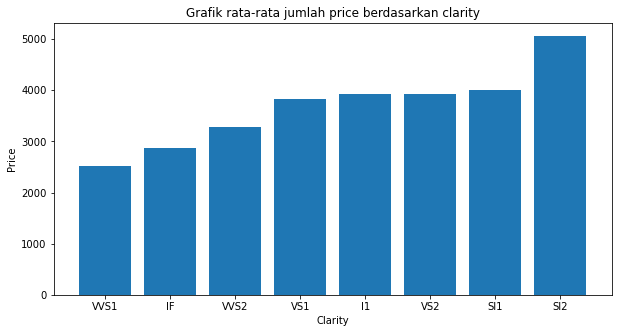

In [7]:
### Eksplorasi Data #2 ### 

#Eksplorasi kedua dilakukan dengan membandingkan atribut price dengan beberapa atribut bertipe kategorik

# Membuat grafik untuk melihat hubungan antara atribut Color dengan Price. 
# Grafik dibuat dengan membandingkan rata-rata Price dengan jenis Color.
ColorToPrice = data.groupby('color').mean().sort_values('color')
plt.figure(figsize=[10,5])
plt.title('Grafik rata-rata jumlah price berdasarkan color')
plt.xlabel('color')
plt.ylabel('Price')
plt.bar(ColorToPrice.index, ColorToPrice['price'])
plt.show()

# Membuat grafik untuk melihat hubungan antara atribut Cut dengan Price. 
# Grafik dibuat dengan membandingkan rata-rata Price dengan jenis Cut.
CutToPrice = data.groupby('cut').mean().sort_values('price')
plt.figure(figsize=[10,5])
plt.title('Grafik rata-rata jumlah price berdasarkan cut')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.bar(CutToPrice.index, CutToPrice['price'])
plt.show()

# Membuat grafik untuk melihat hubungan antara atribut Clarity dengan Price. 
# Grafik dibuat dengan membandingkan rata-rata Price dengan jenis Clarity.
ClarityToPrice = data.groupby('clarity').mean().sort_values('price')
plt.figure(figsize=[10,5])
plt.title('Grafik rata-rata jumlah price berdasarkan clarity')
plt.xlabel('Clarity')
plt.ylabel('Price')
plt.bar(ClarityToPrice.index, ClarityToPrice['price'])
plt.show()

# Membuat grafik untuk melihat hubungan antara atribut Carat dengan Clarity. 
# Grafik dibuat dengan membandingkan rata-rata Carat dengan jenis Clarity.
avgCaratClarity = data.groupby('clarity').mean().sort_values('clarity', ascending=True)
plt.figure(figsize=[10,5])
plt.title('Grafik rata-rata jumlah carat berdasarkan clarity')
plt.xlabel('Clarity')
plt.ylabel('Carat')
plt.bar(avgCaratClarity.index, avgCaratClarity['carat'])
plt.show()